           0     4      5  6  7  8  9  10  11  12 ...  REJ  RSTO  RSTOS0  \
0          0   491      0  0  0  0  0   0   0   0 ...    0     0       0   
1          0   146      0  0  0  0  0   0   0   0 ...    0     0       0   
2          0     0      0  0  0  0  0   0   0   0 ...    0     0       0   
3          0   232   8153  0  0  0  0   0   1   0 ...    0     0       0   
4          0   199    420  0  0  0  0   0   1   0 ...    0     0       0   
5          0     0      0  0  0  0  0   0   0   0 ...    1     0       0   
6          0     0      0  0  0  0  0   0   0   0 ...    0     0       0   
7          0     0      0  0  0  0  0   0   0   0 ...    0     0       0   
8          0     0      0  0  0  0  0   0   0   0 ...    0     0       0   
9          0     0      0  0  0  0  0   0   0   0 ...    0     0       0   
10         0     0      0  0  0  0  0   0   0   0 ...    1     0       0   
11         0     0      0  0  0  0  0   0   0   0 ...    0     0       0   
12         0

/home/manisha/.local/lib/python3.5/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [16] are constant.
  UserWarning)
/home/manisha/.local/lib/python3.5/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


X train shape: (125973, 122)
x train selected shape (125973, 61)
[ True False False False  True False  True  True  True False  True False
 False False  True False False False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False False  True False False  True  True
  True  True False False False  True False  True  True False False False
  True  True False False False  True False  True False  True False False
 False False False False False False False False False  True False False
  True False False False False  True  True False False False False  True
 False False False  True False  True False False False False False  True
  True  True  True False  True  True  True  True  True False False False
  True  True]
Selected from model (125973, 61)
[ True  True  True  True  True False  True  True  True  True  True  True
 False  True  True False False False False  True  True  True  True  True
  True  True

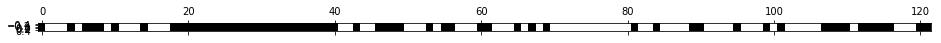

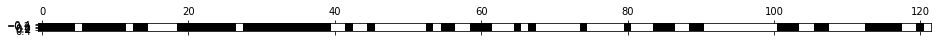

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
train = pd.read_csv('KDDTrain2.csv',header=None)
train = train.iloc[:,:-1]
#print(train)
x_train = train.iloc[:,:-1]
#print(x_train)
y_train = train.iloc[:,-1]
#print(y_train)

#one hot encoding of categorical variables:
x_train=pd.concat([x_train,pd.get_dummies(x_train[1])],axis=1)
x_train.drop([1],axis=1,inplace=True)
#print(x_train)

x_train = pd.concat([x_train,pd.get_dummies(x_train[2])],axis=1)
x_train.drop([2],axis=1,inplace=True)
#print(x_train)

x_train = pd.concat([x_train,pd.get_dummies(x_train[3])],axis=1)
x_train.drop([3],axis=1,inplace=True)
#print(x_train)

selected = SelectPercentile(percentile=50)
selected.fit(x_train,y_train)

x_train_selected=selected.transform(x_train)
print('X train shape:',x_train.shape)
print('x train selected shape',x_train_selected.shape)

mask = selected.get_support()
print(mask)
plt.matshow(mask.reshape(1,-1),cmap="gray_r")

select = SelectFromModel(DecisionTreeClassifier(),threshold="median")
select.fit(x_train,y_train)
select_m=select.transform(x_train)
print('Selected from model',select_m.shape)

mask2 = select.get_support()
print(mask2)
plt.matshow(mask2.reshape(1,-1),cmap="gray_r")

In [10]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model = model.fit(x_train,y_train)